In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.linear_model._logistic import LogisticRegression

In [151]:
loan_data = pd.read_excel('loan-data.xlsx', usecols=['funded_amnt','term','int_rate', 'installment','emp_length','home_ownership', 'annual_inc','verification_status', 'loan_status','purpose', 'last_credit_pull_d', 'repay_fail'])

In [152]:
loan_data.shape

(38480, 12)

In [153]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38480 entries, 0 to 38479
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funded_amnt          38479 non-null  float64       
 1   term                 38480 non-null  object        
 2   int_rate             38480 non-null  float64       
 3   installment          38479 non-null  float64       
 4   emp_length           37487 non-null  object        
 5   home_ownership       38480 non-null  object        
 6   annual_inc           38478 non-null  float64       
 7   verification_status  38480 non-null  object        
 8   loan_status          38480 non-null  object        
 9   purpose              38480 non-null  object        
 10  last_credit_pull_d   38477 non-null  datetime64[ns]
 11  repay_fail           38480 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 3.5+ MB


In [154]:
loan_data.isnull().sum()

funded_amnt              1
term                     0
int_rate                 0
installment              1
emp_length             993
home_ownership           0
annual_inc               2
verification_status      0
loan_status              0
purpose                  0
last_credit_pull_d       3
repay_fail               0
dtype: int64

In [155]:
loan_data.dropna(inplace=True)

In [156]:
loan_data.head()

,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,last_credit_pull_d,repay_fail
0,0.0,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,Charged Off,major_purchase,2023-01-07,1
1,2500.0,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,Does not meet the credit policy. Status:Fully ...,other,2023-06-16,0
2,5000.0,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,Charged Off,debt_consolidation,2023-03-12,1
3,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,Fully Paid,other,2023-03-14,0
4,2000.0,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,Fully Paid,debt_consolidation,2023-06-16,0


In [157]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37482 entries, 0 to 38479
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funded_amnt          37482 non-null  float64       
 1   term                 37482 non-null  object        
 2   int_rate             37482 non-null  float64       
 3   installment          37482 non-null  float64       
 4   emp_length           37482 non-null  object        
 5   home_ownership       37482 non-null  object        
 6   annual_inc           37482 non-null  float64       
 7   verification_status  37482 non-null  object        
 8   loan_status          37482 non-null  object        
 9   purpose              37482 non-null  object        
 10  last_credit_pull_d   37482 non-null  datetime64[ns]
 11  repay_fail           37482 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 3.7+ MB


In [158]:
loan_data['term'] = loan_data['term'].str.split(' ',expand=True)[0]

In [159]:
loan_data['term'] = loan_data['term'].astype(float)

In [160]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37482 entries, 0 to 38479
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funded_amnt          37482 non-null  float64       
 1   term                 37482 non-null  float64       
 2   int_rate             37482 non-null  float64       
 3   installment          37482 non-null  float64       
 4   emp_length           37482 non-null  object        
 5   home_ownership       37482 non-null  object        
 6   annual_inc           37482 non-null  float64       
 7   verification_status  37482 non-null  object        
 8   loan_status          37482 non-null  object        
 9   purpose              37482 non-null  object        
 10  last_credit_pull_d   37482 non-null  datetime64[ns]
 11  repay_fail           37482 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 3.7+ MB


In [161]:
loan_data['emp_length'] = loan_data['emp_length'].str.split(' ',expand=True)[0]

In [162]:
loan_data['emp_length'] = loan_data['emp_length'].str.replace('<','0')

In [163]:
loan_data['emp_length'] = loan_data['emp_length'].str.replace('10+','10')

In [164]:
loan_data['emp_length']= loan_data['emp_length'].astype(float)

In [165]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37482 entries, 0 to 38479
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funded_amnt          37482 non-null  float64       
 1   term                 37482 non-null  float64       
 2   int_rate             37482 non-null  float64       
 3   installment          37482 non-null  float64       
 4   emp_length           37482 non-null  float64       
 5   home_ownership       37482 non-null  object        
 6   annual_inc           37482 non-null  float64       
 7   verification_status  37482 non-null  object        
 8   loan_status          37482 non-null  object        
 9   purpose              37482 non-null  object        
 10  last_credit_pull_d   37482 non-null  datetime64[ns]
 11  repay_fail           37482 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 3.7+ MB


In [168]:
loan_data['loan_status'].unique()

array(['Charged Off', 'Conditional Fully Paid', 'Fully Paid',
       'Conditional Charged Off', 'Current', 'Late_L2', 'In Grace Period',
       'Late_L1', 'Default'], dtype=object)

In [167]:
loan_data['loan_status'] = loan_data['loan_status'].str.replace('Late (31-120 days)','Late_L2').str.replace('Late (16-30 days)','Late_L1').str.replace('Does not meet the credit policy. Status:Fully Paid', 'Conditional Fully Paid').str.replace('Does not meet the credit policy. Status:Charged Off','Conditional Charged Off')

In [169]:
loan_data[['funded_amnt','term','int_rate', 'installment','emp_length','annual_inc']].describe()

,funded_amnt,term,int_rate,installment,emp_length,annual_inc
count,37482.000000,37482.000000,37482.000000,37482.000000,37482.000000,3.748200e+04
mean,10897.622192,42.171282,12.194058,325.288150,4.922283,6.960366e+04
std,7153.887897,10.489470,3.700522,209.369972,3.564843,6.494118e+04
min,0.000000,36.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,5275.000000,36.000000,9.630000,167.340000,2.000000,4.100000e+04
50%,9600.000000,36.000000,11.990000,280.215000,4.000000,6.000000e+04
75%,15000.000000,60.000000,14.740000,432.452500,9.000000,8.300000e+04
max,35000.000000,60.000000,24.110000,1305.190000,10.000000,6.000000e+06


In [196]:
loan_data['repay_fail'].value_counts()

repay_fail
0    31874
1     5608
Name: count, dtype: int64

In [218]:
class_0 = loan_data[loan_data.repay_fail==0].sample(6000)

In [220]:
class_1 = loan_data[loan_data.repay_fail==1]

In [222]:
loan_data = pd.concat([class_0,class_1])

In [223]:
loan_data

,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,repay_fail
36667,4000.0,36.0,8.07,125.48,4.0,RENT,21600.0,Not Verified,Fully Paid,debt_consolidation,0
10460,15625.0,60.0,11.49,343.56,5.0,MORTGAGE,40000.0,Verified,Fully Paid,home_improvement,0
33391,15000.0,36.0,13.22,507.01,0.0,RENT,102000.0,Not Verified,Fully Paid,debt_consolidation,0
4425,15675.0,60.0,6.91,309.72,10.0,OWN,50000.0,Verified,Fully Paid,credit_card,0
16567,5000.0,60.0,21.28,136.06,3.0,RENT,46000.0,Verified,Fully Paid,debt_consolidation,0
...,...,...,...,...,...,...,...,...,...,...,...
38454,15450.0,36.0,17.86,557.48,4.0,MORTGAGE,140000.0,Not Verified,Conditional Charged Off,debt_consolidation,1
38456,12000.0,60.0,10.99,260.85,10.0,MORTGAGE,55000.0,Source Verified,Charged Off,major_purchase,1
38458,4500.0,36.0,14.30,154.46,4.0,RENT,32500.0,Verified,Conditional Charged Off,debt_consolidation,1
38471,1500.0,36.0,16.29,52.96,1.0,RENT,27000.0,Not Verified,Charged Off,wedding,1


In [195]:
# loan_data.drop(columns=['last_credit_pull_d'], inplace=True)

KeyError: "['last_credit_pull_d'] not found in axis"

In [224]:
X_train,X_test,y_train,y_test = train_test_split(loan_data.drop(columns=['repay_fail']),
                                                 loan_data['repay_fail'],
                                                 test_size=0.2,
                                                random_state=0)

In [225]:
X_train.shape

(9286, 10)

In [226]:
ohe = OneHotEncoder()
ohe.fit(loan_data[['home_ownership', 'verification_status', 'loan_status', 'purpose']])

OneHotEncoder()

In [242]:
columTransformer = ColumnTransformer(transformers=
    [
        ('tf1', OneHotEncoder(categories=ohe.categories_),['home_ownership', 'verification_status', 'loan_status', 'purpose'])
 
 ],
 remainder='passthrough')

In [228]:
X_train = columTransformer.fit_transform(X_train)

In [229]:
X_test = columTransformer.fit_transform(X_test)

In [230]:
X_train = X_train.toarray()

In [231]:
X_test = X_test.toarray()

In [244]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [243]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

C:\Users\Zahid-CS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [245]:
y_pred = tree.predict(X_test)

In [246]:
accuracy_score(y_test, y_pred)

1.0

In [247]:
cm=confusion_matrix(y_test, y_pred)

In [248]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1183\n           1       1.00      1.00      1.00      1139\n\n    accuracy                           1.00      2322\n   macro avg       1.00      1.00      1.00      2322\nweighted avg       1.00      1.00      1.00      2322\n'

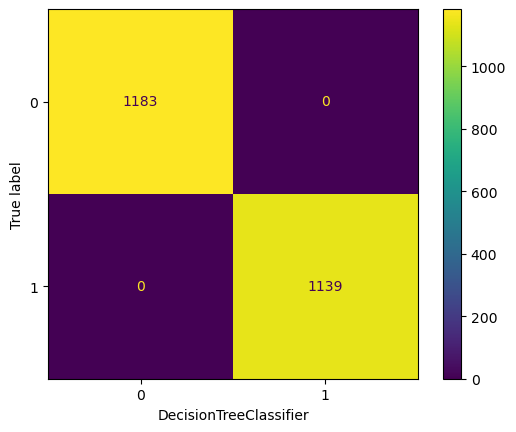

In [249]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)

disp.plot()
plt.xlabel('DecisionTreeClassifier')
plt.show()